In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
%ls

drive/  sample_data/


In [24]:
%cd '/content/drive/My Drive/Colab Notebooks/db'

/content/drive/My Drive/Colab Notebooks/db


In [25]:
%ls

API_19_DS2_en_csv_v2_3470836.csv
API_AG.LND.AGRI.ZS_DS2_en_csv_v2_3470479.csv
API_AG.LND.FRST.ZS_DS2_en_csv_v2_3469441.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3475310.csv
API_SP.POP.TOTL_DS2_en_csv_v2_3469297.csv
conexion_bd.ipynb
Copia_de_superstore_1.xls
covid_19_clean_complete.csv
FBITC012091.csv
GlobalLandTemperaturesByCountry.csv
london_merged.csv
poblacion_mundial.csv
test.csv
test.hdf
test.json
test.parquet
test.pkl
test.xls


In [26]:
import pandas as pd
import numpy as np
pd.__version__

'1.1.5'

In [27]:
df_gtemp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [28]:
df_gtemp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [29]:
df_gtemp.shape #ver el tamaño del df

(577462, 4)

In [30]:
df_gtemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [31]:
df_gtemp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [32]:
df_gtemp['year'] = pd.to_datetime(df_gtemp['dt'])
df_gtemp['year'] 

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [33]:
idx = df_gtemp['year']> pd.to_datetime('1970-01-01')
df_gtemp = df_gtemp[idx]
df_gtemp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [34]:
df_t_avg = df_gtemp.groupby(['Country',pd.Grouper(key='year',freq='1Y')]).agg({'AverageTemperature':[np.mean,np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

In [35]:
df_t_avg.xs('Venezuela')['AverageTemperature'] #me da el valor de un país concreto

,mean,median
year,,
1970-12-31,25.367364,25.2780
1971-12-31,24.724417,24.6480
1972-12-31,25.237000,25.2615
1973-12-31,25.482333,25.2020
1974-12-31,25.003250,25.0760
1975-12-31,25.037250,24.9790
1976-12-31,25.023250,25.0590
1977-12-31,25.595583,25.6165
1978-12-31,25.499000,25.5600


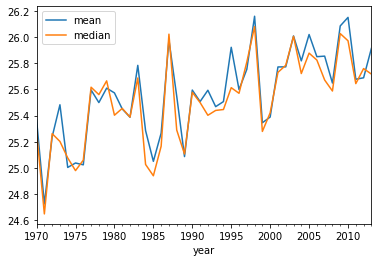

In [36]:
df_t_avg.xs('Venezuela')['AverageTemperature'].plot()

In [37]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [38]:
df_t_med['date'] = df_t_med['year'].dt.year #esto permite cambiar la fecha a solo año
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [39]:
df_t_med.rename(columns={'median':'temperature'},inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [40]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date',columns='Country')
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,11.1180,28.6180,8.6480,21.9360,6.3550,12.4300,25.6190,27.4460,25.5650,27.9370,27.0110,6.5360,10.6590,26.4620,27.0670,13.1690,21.9350,28.3010,10.0870,23.4400,25.4440,26.7220,11.5200,28.1070,25.7410,19.9750,27.1040,24.4220,-1.6320,24.7480,...,22.6690,1.2720,14.4880,13.7550,27.6430,28.3390,26.4830,-5.8620,19.2560,3.2700,7.4020,19.4770,24.2230,6.4740,22.3660,26.8520,26.8290,27.0600,23.6180,26.4450,20.1740,12.9030,17.4190,26.8910,22.8360,10.0670,28.9860,9.7340,9.9730,8.2860,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,8.6390,28.0850,8.1845,22.2985,7.1385,10.7060,25.4960,25.5135,25.3280,26.3180,26.4790,5.7755,10.0065,25.2630,26.9295,12.6415,21.2455,27.2900,10.1885,23.9550,24.9120,26.2470,9.5820,27.9310,24.7345,19.6260,27.0150,24.0725,-3.4755,23.6530,...,21.9110,1.5420,11.9565,12.6455,27.1535,27.9145,25.8920,-10.5280,19.5295,1.6720,8.5215,17.1220,22.1795,5.8390,22.3920,26.6300,26.4135,26.3805,23.8420,26.0095,19.6470,10.6395,14.9685,26.7755,22.7355,7.4325,27.8175,8.7785,8.9780,8.7545,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,11.4950,28.6780,8.6445,22.3470,5.3755,13.6880,25.8145,26.3535,26.0285,26.9035,27.0225,6.0925,8.7840,25.8145,26.7025,12.5800,21.9525,27.8050,9.7260,23.0225,25.1430,26.6150,10.6495,28.2305,25.4830,20.0425,27.2160,24.1850,-6.6775,23.6670,...,22.3110,0.4455,12.5585,12.2105,27.4820,28.9775,26.1590,-5.9665,19.9670,2.2865,6.1615,19.4300,23.0640,4.9110,22.6910,26.9205,26.2535,27.0445,23.2235,26.4690,18.6385,13.2440,16.3415,27.1115,23.2850,9.0295,28.0485,8.6235,8.7990,8.2290,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,9.7335,28.1630,8.5830,22.9775,4.5905,11.8825,25.5835,27.0690,25.9215,27.1555,26.8725,5.7910,8.0960,26.4840,27.3385,13.5435,22.4190,27.7220,9.3100,23.6135,25.2795,27.0685,10.5565,28.4860,25.4180,20.2410,27.4025,24.6665,-3.6645,24.5360,...,22.4800,1.6770,12.8265,12.3910,27.5945,28.6225,26.4350,-9.6135,18.8930,0.4795,5.1230,18.9260,23.2600,5.5885,22.7820,26.9290,27.0445,26.9310,23.9020,26.4575,19.6385,12.1315,15.8780,26.8120,23.0450,8.5070,28.7285,7.4480,7.5175,8.8785,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,9.3265,27.7935,8.3875,21.6105,5.1555,11.6075,25.2450,26.3585,25.4955,27.2765,26.7885,6.1085,8.3310,25.6020,26.7790,14.0195,21.2395,27.3970,8.3580,22.0050,24.7665,26.1720,10.4035,27.0055,25.5345,19.8995,27.2265,24.0195,-6.0400,23.3540,...,21.8890,1.4885,12.2490,10.8630,27.2295,28.1990,25.8925,-7.0340,19.3190,2.4690,5.4260,19.1350,22.9360,5.6675,22.3410,26.7550,26.4965,26.4465,23.8720,26

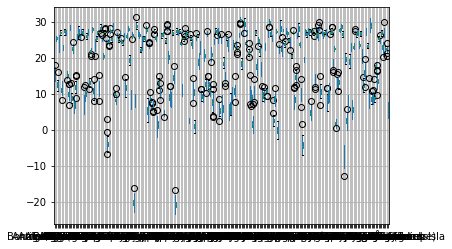

In [41]:
df_t_pivot.boxplot()

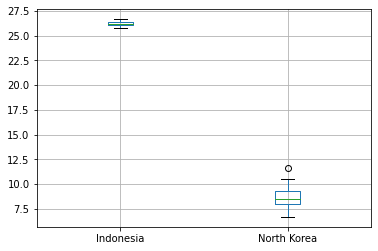

In [42]:
df_t_pivot.T.sample(2).T.boxplot()

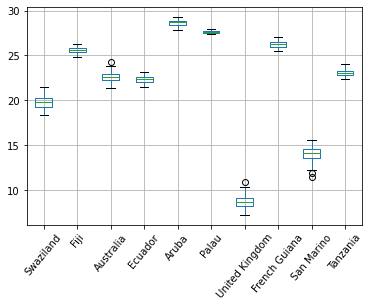

In [43]:
df_t_pivot.T.sample(10).T.boxplot(rot=50) # rot permite que los nombres de los paises no se vean sobrepuestos


In [44]:
%ls
%pwd

API_19_DS2_en_csv_v2_3470836.csv
API_AG.LND.AGRI.ZS_DS2_en_csv_v2_3470479.csv
API_AG.LND.FRST.ZS_DS2_en_csv_v2_3469441.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3475310.csv
API_SP.POP.TOTL_DS2_en_csv_v2_3469297.csv
conexion_bd.ipynb
Copia_de_superstore_1.xls
covid_19_clean_complete.csv
FBITC012091.csv
GlobalLandTemperaturesByCountry.csv
london_merged.csv
poblacion_mundial.csv
test.csv
test.hdf
test.json
test.parquet
test.pkl
test.xls


'/content/drive/My Drive/Colab Notebooks/db'

In [45]:
pd.__version__

'1.1.5'

In [46]:
df_agri = pd.read_csv('API_AG.LND.AGRI.ZS_DS2_en_csv_v2_3470479.csv',header=2) #para empezar en la línea 2 se usa el header
df_fore = pd.read_csv('API_AG.LND.FRST.ZS_DS2_en_csv_v2_3469441.csv',header=2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3475310.csv',header=2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_3469297.csv',header=2)
df_co2e = pd.read_csv('API_19_DS2_en_csv_v2_3470836.csv',header=2)

In [47]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,59070.0,59442.0,59849.0,60236.0,60527.0,60653.0,60586.0,60366.0,60102.0,59972.0,60097.0,60561.0,61341.0,62213.0,62826.0,63024.0,62645.0,61838.0,61072.0,61033.0,62152.0,64623.0,68240.0,72495.0,76705.0,80324.0,83211.0,85450.0,87280.0,89009.0,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,170257189.0,175100167.0,180141148.0,185376550.0,190800796.0,196409937.0,202205766.0,208193045.0,214368393.0,220740384.0,227305945.0,234058404.0,240999134.0,248146290.0,255530063.0,263161451.0,271050065.0,279184536.0,287524258.0,296024639.0,304648010.0,313394693.0,322270073.0,331265579.0,340379934.0,349605660.0,358953595.0,368440591.0,378098393.0,387977990.0,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,504604672.0,518468229.0,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,11173654.0,11475450.0,11791222.0,12108963.0,12412960.0,12689164.0,12943093.0,13171294.0,13341199.0,13411060.0,13356500.0,13171679.0,12882518.0,12537732.0,12204306.0,11938204.0,11736177.0,11604538.0,11618008.0,11868873.0,12412311.0,13299016.0,14485543.0,15816601.0,17075728.0,18110662.0,18853444.0,19357126.0,19737770.0,20170847.0,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,120269044.0,123184308.0,126218502.0,129384954.0,132699537.0,136173544.0,139813171.0,143615715.0,147571063.0,151663853.0,155882270.0,160223588.0,164689764.0,169279422.0,173991851.0,178826553.0,183785612.0,188868567.0,194070079.0,199382783.0,204803865.0,210332267.0,215976366.0,221754806.0,227692136.0,233807627.0,240114179.0,246613750.0,253302310.0,260170348.0,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,341050537.0,350556886.0,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,5890360.0,6041239.0,6248965.0,6497283.0,6761623.0,7023994.0,7279630.0,7533814.0,7790774.0,8058112.0,8341290.0,8640478.0,8952971.0,9278104.0,9614756.0,9961993.0,10320116.0,10689247.0,11068051.0,11454784.0,11848385.0,12248901.0,12657361.0,13075044.0,13503753.0,13945205.0,14400722.0,14871572.0,15359600.0,15866871.0,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [48]:
#fechas = pd.date_range(start='1970', end='2015', freq='Y')
#fechas =fechas.map(lambda x: str(x.year))
#fechas


In [49]:
cols = ['Country Name','Country Code']+list(map(str,range(1970,2016)))
cols

['Country Name',
 'Country Code',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [50]:
df_agri.loc[:,cols]

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111
1,Africa Eastern and Southern,AFE,43.825603,43.951631,43.998370,44.000501,44.014277,44.048306,44.069625,44.072987,44.162363,44.128088,44.116937,44.207215,44.210495,44.245590,44.245262,44.422211,44.484856,44.513309,44.560703,44.650981,43.570264,42.699265,42.839104,41.469711,41.592084,41.687070,41.797964,41.960025,42.106997,42.344084,42.516803,42.642344,42.764293,42.997381,42.833931,42.959439,43.077419,43.202734,43.458883,43.652181,43.799190,43.171751,43.621913,43.747682,43.877935,43.937150
2,Afghanistan,AFG,58.214625,58.260577,58.275894,58.278957,58.278957,58.278957,58.278957,58.282021,58.282021,58.280489,58.280489,58.286616,58.288148,58.288148,58.288148,58.288148,58.288148,58.274362,58.266703,58.266703,58.266703,58.251386,58.251386,58.104341,57.919003,57.827099,57.825568,57.883773,58.001716,57.827099,57.827099,57.827099,57.827099,58.067580,58.069111,58.067580,58.067580,58.067580,58.067580,58.067580,58.069111,58.067580,58.067580,58.067580,58.067580,58.067580
3,Africa Western and Central,AFW,34.459372,34.296558,33.829138,34.392334,33.880268,33.835556,33.901996,33.428737,33.308681,33.286571,33.630378,33.254623,33.454274,33.582952,34.057428,34.380120,35.033684,35.060216,35.247486,35.320337,35.237689,35.457038,35.665027,35.898754,36.109258,36.647519,36.523081,36.731595,36.768123,36.980680,37.093079,37.420100,37.545042,37.842222,37.800826,38.480512,38.491109,38.669627,38.961421,39.094094,39.265777,39.349683,39.514961,39.740192,39.765147,39.792053
4,Angola,AGO,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.041550,46.044758,36.546593,36.671255,36.795918,36.920581,37.045243,37.169906,37.294569,37.419232,37.543894,37.668557,38.113781,38.559005,39.004230,39.449454,39.894678,40.339902,40.785126,41.230351,41.675575,42.120799,42.566024,43.011249,43.456474,43.901699,44.346924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.356021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,44.354793,44.369945,44.390780,44.400250,44.409720,44.434343,44.434343,44.434343,44.438131,44.440025,44.440025,44.443813,44.443813,44.443813,44.443813,44.453283,44.453283,44.470330,44.470330,44.474118,44.748755,44.758225,44.474118,44.936265,44.945736,44.957100,44.993087,44.926795,44.851033,44.828305,44.830199,44.690039,44.805576,44.500635,44.618065,44.553668,44.750649,44.750649,44.542304,44.419190,44.659734,44.419190,44.511999,44.508211,44.418433,44.382446
263,South Africa,ZAF,78.798770,78.633902,78.473155,78.304165,78.151662,77.970307,77.802966,77.751857,77.718883,77.661179,77.619962,77.570502,77.515271,77.515271,77.515271,77.515271,77.817804,78.023889,78.229975,78.559711,78.807013,79.140872,79.526663,79.908333,80.179542,80.389748,80.694755,80.740093,80.775540,80.833244,80.888475,80.796149,80.808514,80.726080,80.462291,80.359248,79.868765,79.870414,80.050120,79.951199,79.871238,79.445054,79.417850

In [51]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code'])

,Country Name,Country Code,variable,value
0,Aruba,ABW,1970,11.111111
1,Africa Eastern and Southern,AFE,1970,43.825603
2,Afghanistan,AFG,1970,58.214625
3,Africa Western and Central,AFW,1970,34.459372
4,Angola,AGO,1970,46.041550
...,...,...,...,...
12231,Kosovo,XKX,2015,NaN
12232,"Yemen, Rep.",YEM,2015,44.382446
12233,South Africa,ZAF,2015,79.417850
12234,Zambia,ZMB,2015,32.063923


In [52]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'agriculture'
             })

,Country,name,date,agriculture
0,Aruba,ABW,1970,11.111111
1,Africa Eastern and Southern,AFE,1970,43.825603
2,Afghanistan,AFG,1970,58.214625
3,Africa Western and Central,AFW,1970,34.459372
4,Angola,AGO,1970,46.041550
...,...,...,...,...
12231,Kosovo,XKX,2015,NaN
12232,"Yemen, Rep.",YEM,2015,44.382446
12233,South Africa,ZAF,2015,79.417850
12234,Zambia,ZMB,2015,32.063923


In [53]:
def fun_formato(df,col='agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':col})
             
  

In [54]:
df_agri= fun_formato(df_agri,col='agriculture')
df_co2e= fun_formato(df_co2e,col='co2')
df_elec= fun_formato(df_elec,col='electricprod')
df_fore= fun_formato(df_fore,col='forest')
df_popu= fun_formato(df_popu,col='populatio')
df_popu

,Country,name,date,populatio
0,Aruba,ABW,1970,59070.0
1,Africa Eastern and Southern,AFE,1970,170257189.0
2,Afghanistan,AFG,1970,11173654.0
3,Africa Western and Central,AFW,1970,120269044.0
4,Angola,AGO,1970,5890360.0
...,...,...,...,...
12231,Kosovo,XKX,2015,1788196.0
12232,"Yemen, Rep.",YEM,2015,26497881.0
12233,South Africa,ZAF,2015,55386369.0
12234,Zambia,ZMB,2015,15879370.0


In [55]:
df_popu

,Country,name,date,populatio
0,Aruba,ABW,1970,59070.0
1,Africa Eastern and Southern,AFE,1970,170257189.0
2,Afghanistan,AFG,1970,11173654.0
3,Africa Western and Central,AFW,1970,120269044.0
4,Angola,AGO,1970,5890360.0
...,...,...,...,...
12231,Kosovo,XKX,2015,1788196.0
12232,"Yemen, Rep.",YEM,2015,26497881.0
12233,South Africa,ZAF,2015,55386369.0
12234,Zambia,ZMB,2015,15879370.0


In [56]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [57]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12236 entries, 0 to 12235
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    12236 non-null  object 
 1   name       12236 non-null  object 
 2   date       12236 non-null  object 
 3   populatio  12163 non-null  float64
dtypes: float64(1), object(3)
memory usage: 382.5+ KB


In [58]:
df_t_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      10692 non-null  object        
 1   year         10692 non-null  datetime64[ns]
 2   temperature  10648 non-null  float64       
 3   date         10692 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 334.2+ KB


In [59]:
def type_date(df):
  df['date']= df['date'].astype(int)
  return df

In [60]:
df_agri = type_date(df_agri)
df_co2e = type_date(df_co2e)
df_elec = type_date(df_elec)
df_fore = type_date(df_fore)
df_popu = type_date(df_popu)
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12236 entries, 0 to 12235
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    12236 non-null  object 
 1   name       12236 non-null  object 
 2   date       12236 non-null  int64  
 3   populatio  12163 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 382.5+ KB


In [61]:
df_merge = pd.merge(df_t_med[['Country','temperature','date']],
                             df_popu, on=['Country','date'], how = 'inner')
df_merge

,Country,temperature,date,name,populatio
0,Afghanistan,16.1990,1970,AFG,11173654.0
1,Afghanistan,14.9340,1971,AFG,11475450.0
2,Afghanistan,13.8725,1972,AFG,11791222.0
3,Afghanistan,14.9130,1973,AFG,12108963.0
4,Afghanistan,13.6160,1974,AFG,12412960.0
...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,ZWE,12526964.0
7388,Zimbabwe,23.3040,2010,ZWE,12697728.0
7389,Zimbabwe,22.9420,2011,ZWE,12894323.0
7390,Zimbabwe,23.0455,2012,ZWE,13115149.0


In [62]:
for i in df_agri, df_fore, df_elec, df_co2e,df_popu:
  df_merge= pd.merge(df_merge,i,
                   on = ['Country','date','name'],
                   how='inner')

In [63]:
df_merge

,Country,temperature,date,name,populatio_x,agriculture,forest,electricprod,co2,populatio_y
0,Afghanistan,16.1990,1970,AFG,11173654.0,58.214625,NaN,NaN,1.164300e+01,11173654.0
1,Afghanistan,16.1990,1970,AFG,11173654.0,58.214625,NaN,NaN,1.300949e+06,11173654.0
2,Afghanistan,16.1990,1970,AFG,11173654.0,58.214625,NaN,NaN,5.748488e+00,11173654.0
3,Afghanistan,16.1990,1970,AFG,11173654.0,58.214625,NaN,NaN,1.117365e+07,11173654.0
4,Afghanistan,16.1990,1970,AFG,11173654.0,58.214625,NaN,NaN,2.536744e+00,11173654.0
...,...,...,...,...,...,...,...,...,...,...
561787,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,NaN,13350378.0
561788,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,NaN,13350378.0
561789,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,1.033993e+01,13350378.0
561790,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,4.187670e+01,13350378.0


In [64]:
df_merge.drop(columns='populatio_y',inplace=True)

In [65]:
df_merge.rename(columns={'populatio_x':'population'},inplace=True)

In [66]:
df_merge

,Country,temperature,date,name,population,agriculture,forest,electricprod,co2
0,Afghanistan,16.1990,1970,AFG,11173654.0,58.214625,NaN,NaN,1.164300e+01
1,Afghanistan,16.1990,1970,AFG,11173654.0,58.214625,NaN,NaN,1.300949e+06
2,Afghanistan,16.1990,1970,AFG,11173654.0,58.214625,NaN,NaN,5.748488e+00
3,Afghanistan,16.1990,1970,AFG,11173654.0,58.214625,NaN,NaN,1.117365e+07
4,Afghanistan,16.1990,1970,AFG,11173654.0,58.214625,NaN,NaN,2.536744e+00
...,...,...,...,...,...,...,...,...,...
561787,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,NaN
561788,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,NaN
561789,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,1.033993e+01
561790,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,4.187670e+01


In [67]:
df_climate=df_merge.dropna() #dropna sirve para quitar los datos vacíos pero hay que tener cuidado de lo que queremos estudiar, no siempre es recomendable borrar
df_climate

,Country,temperature,date,name,population,agriculture,forest,electricprod,co2
4864,Albania,13.4490,1990,ALB,3286542.0,40.912409,28.788321,552.252185,3.642800e+01
4865,Albania,13.4490,1990,ALB,3286542.0,40.912409,28.788321,552.252185,1.197222e+06
4866,Albania,13.4490,1990,ALB,3286542.0,40.912409,28.788321,552.252185,2.543043e+00
4867,Albania,13.4490,1990,ALB,3286542.0,40.912409,28.788321,552.252185,3.286542e+06
4868,Albania,13.4490,1990,ALB,3286542.0,40.912409,28.788321,552.252185,1.799086e+00
...,...,...,...,...,...,...,...,...,...
561782,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,4.592754e+01
561783,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,1.776707e+05
561789,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,1.033993e+01
561790,Zimbabwe,20.4505,2013,ZWE,13350378.0,41.876696,45.927543,628.746242,4.187670e+01


### ***Análisis de datos 29/29***


In [68]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
Montenegro    40.111940
Brazil        40.046720
Guatemala     38.825495
Canada        38.798235
Senegal       38.300000
                ...    
Libya          8.782125
Qatar          8.674164
Iceland        7.754015
Suriname       7.334000
Malta          4.644588
Name: co2, Length: 120, dtype: float64

In [69]:
pd.set_option('display.float_format','{:,.1f}'.format)

In [70]:
first_ten= df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_ten

Index(['Montenegro', 'Brazil', 'Guatemala', 'Canada', 'Senegal', 'Argentina',
       'Mauritius', 'Israel', 'Nigeria', 'Pakistan'],
      dtype='object', name='Country')

In [71]:
df_max_co2 = df_climate[df_climate['Country'].isin(['Montenegro', 'Brazil', 'Guatemala', 'Canada', 'Senegal', 'Argentina','Mauritius', 'Israel', 'Nigeria', 'Pakistan'])]
df_max_co2

,Country,temperature,date,name,population,agriculture,forest,electricprod,co2
21584,Argentina,15.4,1990,ARG,"32,618,648.0",46.6,12.9,"1,304.0",87.0
21585,Argentina,15.4,1990,ARG,"32,618,648.0",46.6,12.9,"1,304.0","28,373,005.0"
21586,Argentina,15.4,1990,ARG,"32,618,648.0",46.6,12.9,"1,304.0",1.9
21587,Argentina,15.4,1990,ARG,"32,618,648.0",46.6,12.9,"1,304.0","32,618,648.0"
21588,Argentina,15.4,1990,ARG,"32,618,648.0",46.6,12.9,"1,304.0",1.5
...,...,...,...,...,...,...,...,...,...
454774,Senegal,29.9,2013,SEN,"13,782,429.0",46.1,43.4,215.3,43.4
454775,Senegal,29.9,2013,SEN,"13,782,429.0",46.1,43.4,215.3,"83,481.6"
454781,Senegal,29.9,2013,SEN,"13,782,429.0",46.1,43.4,215.3,16.6
454782,Senegal,29.9,2013,SEN,"13,782,429.0",46.1,43.4,215.3,46.1


In [72]:
df_max_co2

,Country,temperature,date,name,population,agriculture,forest,electricprod,co2
21584,Argentina,15.4,1990,ARG,"32,618,648.0",46.6,12.9,"1,304.0",87.0
21585,Argentina,15.4,1990,ARG,"32,618,648.0",46.6,12.9,"1,304.0","28,373,005.0"
21586,Argentina,15.4,1990,ARG,"32,618,648.0",46.6,12.9,"1,304.0",1.9
21587,Argentina,15.4,1990,ARG,"32,618,648.0",46.6,12.9,"1,304.0","32,618,648.0"
21588,Argentina,15.4,1990,ARG,"32,618,648.0",46.6,12.9,"1,304.0",1.5
...,...,...,...,...,...,...,...,...,...
454774,Senegal,29.9,2013,SEN,"13,782,429.0",46.1,43.4,215.3,43.4
454775,Senegal,29.9,2013,SEN,"13,782,429.0",46.1,43.4,215.3,"83,481.6"
454781,Senegal,29.9,2013,SEN,"13,782,429.0",46.1,43.4,215.3,16.6
454782,Senegal,29.9,2013,SEN,"13,782,429.0",46.1,43.4,215.3,46.1


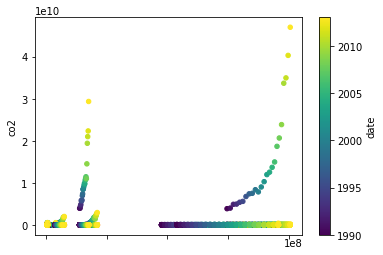

In [73]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis'

)

In [75]:
df_climate.corr() #nos indica la correlacion entre las variables del df

,temperature,date,population,agriculture,forest,electricprod,co2
temperature,1.0,0.0,-0.0,-0.1,0.0,-0.5,-0.0
date,0.0,1.0,0.0,-0.0,0.0,0.1,0.0
population,-0.0,0.0,1.0,0.1,-0.0,-0.1,0.0
agriculture,-0.1,-0.0,0.1,1.0,-0.3,-0.3,-0.0
forest,0.0,0.0,-0.0,-0.3,1.0,-0.1,0.0
electricprod,-0.5,0.1,-0.1,-0.3,-0.1,1.0,0.0
co2,-0.0,0.0,0.0,-0.0,0.0,0.0,1.0


In [76]:
import seaborn as sns

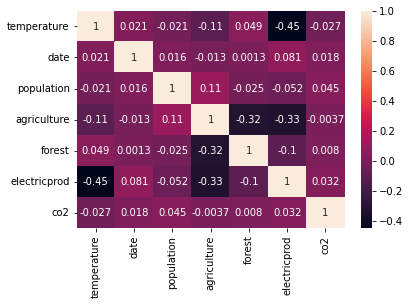

In [78]:
sns.heatmap(df_climate.corr(),annot=True)

In [79]:
df_med=df_climate.groupby('date').median()

In [80]:
df_med

,temperature,population,agriculture,forest,electricprod,co2
date,,,,,,
1990,22.7,"10,230,931.0",43.1,28.8,"1,157.4",18.2
1991,22.4,"10,373,400.0",42.8,28.7,"1,096.2",19.7
1992,19.9,"9,952,494.0",44.0,28.8,"1,446.5",23.1
1993,20.4,"9,964,675.0",45.0,28.6,"1,514.7",21.3
1994,20.2,"10,037,522.0",44.6,28.5,"1,576.8",21.3
1995,20.0,"10,136,811.0",43.7,28.4,"1,634.4",21.0
1996,19.7,"10,156,637.0",45.5,28.4,"1,728.1",22.1
1997,20.0,"10,117,433.0",44.8,28.3,"1,802.8",24.0
1998,20.9,"10,160,196.0",43.8,28.2,"1,808.3",26.4


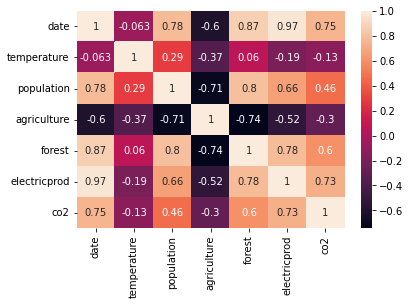

In [81]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [82]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb83f3f9d50>,
      dtype=object)

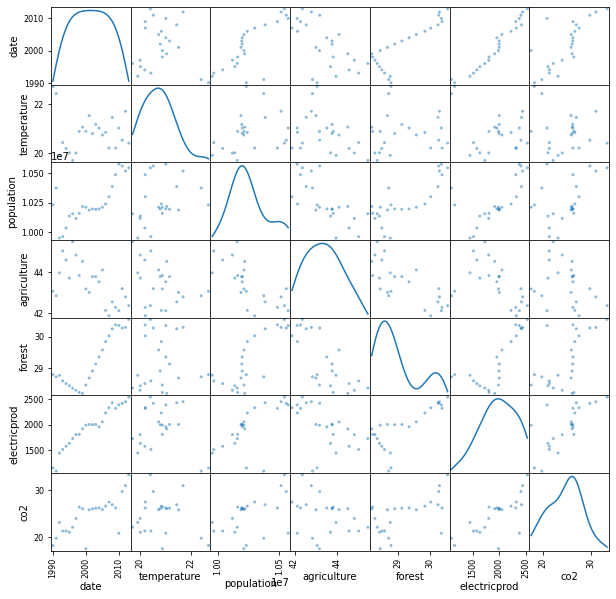

In [84]:
scatter_matrix(df_med.reset_index(), diagonal='kde', figsize=(10,10))

In [86]:
from pandas.plotting import parallel_coordinates

In [87]:
df_samerica=df_climate[df_climate['Country'].isin(['Venezuela','Colombia','Peru','Mexico','Chile'])][['Country','temperature','co2','agriculture','forest']]

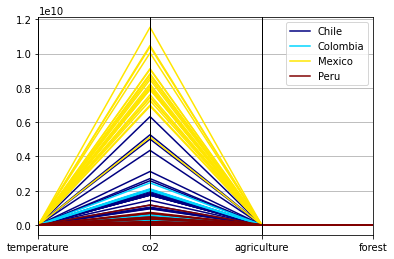

In [91]:
parallel_coordinates(df_samerica,'Country',colormap='jet')

In [92]:
df = pd.DataFrame({
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}, index = ['Ana','Benito','Camilo','Daniel','Erika','Paola','Gabriela'])

In [95]:
df_co2e['date'].mul(df_agri['date'])

print(df.query("(edad >= 12) & (cm < 130) & (Q1 > 5)")['Q2'])

Erika   8.0
Name: Q2, dtype: float64


In [99]:
df.groupby('genero').mean()

,edad,cm,Q1,Q2
genero,,,,
F,11.2,121.2,5.8,8.0
M,12.0,131.7,9.0,8.7


In [100]:
print(df['edad'] >= 12)

Ana         False
Benito      False
Camilo       True
Daniel       True
Erika        True
Paola       False
Gabriela     True
Name: edad, dtype: bool


In [101]:
df.dtypes

edad        int64
cm          int64
pais       object
genero     object
Q1        float64
Q2        float64
dtype: object

In [102]:
pd.NA | False

<NA>

In [103]:
pd.Series([10,8,5,0]) - pd.Series([0,1,6,12])

0    10
1     7
2    -1
3   -12
dtype: int64

In [109]:
print(df.iloc[[4],[2]])

      pais
Erika   mx


In [111]:
df.groupby(['genero'])['cm'].agg([np.mean,np.std])

,mean,std
genero,,
F,121.2,4.8
M,131.7,22.5


In [112]:
print(df.loc[['Ana'],['cm']])

      cm
Ana  115


In [117]:
df.describe(include='all')

,edad,cm,pais,genero,Q1,Q2
count,7.0,7.0,7,7,6.0,7.0
unique,nan,nan,3,2,nan,nan
top,nan,nan,mx,F,nan,nan
freq,nan,nan,3,4,nan,nan
mean,11.6,125.7,NaN,NaN,6.8,8.3
std,1.7,14.6,NaN,NaN,2.5,0.8
min,9.0,110.0,NaN,NaN,3.0,7.0
25%,10.5,117.5,NaN,NaN,5.5,8.0
50%,12.0,125.0,NaN,NaN,7.5,8.0
75%,12.5,127.5,NaN,NaN,8.0,9.0


In [118]:
np.array([10,8,5,0]) * np.array([0,1,6,12])

array([ 0,  8, 30,  0])

In [119]:
df.to_csv

AttributeError: ignored

In [120]:
[10,8,5,0]+[0,1,6,12]

[10, 8, 5, 0, 0, 1, 6, 12]